# Linear Regression

Boston House Prices Dataset: https://www.kaggle.com/vikrishnan/boston-house-prices

In [38]:
import csv
import numpy as np

In [ ]:
def load_data(filename, delimiter):
    samples = []
    targets = []
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=delimiter, quotechar=None)
        for row in reader:
            samples += [row[0:-1]]
            targets += [row[-1]]
    
    digitized_samples = [list(map(float, sample)) for sample in samples]
    targets = [float(target) for target in targets]
    
    train_data = digitized_samples[:-100]
    train_targets = targets[:-100]

    test_data = digitized_samples[-100:]
    test_targets = targets[-100:]
    
    train_data = np.array(train_data)
    train_targets = np.array(train_targets)
    test_data = np.array(test_data)
    test_targets = np.array(test_targets)
    
    mean = train_data.mean(axis=0)
    train_data -= mean
    std = train_data.std(axis=0)
    train_data /= std
    test_data -= mean
    test_data /= std
    
    return train_data, train_targets, test_data, test_targets

### Load data

In [40]:
train_data, train_targets, test_data, test_targets = load_data('data/housing/housing.csv', ' ')

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Create and fit model

In [42]:
regressor = LinearRegression()  
regressor.fit(train_data, train_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Check model accuracy

In [43]:
preds = regressor.predict(test_data)

In [44]:
preds

array([ 6.78773999, 21.36799098, 15.4223225 , 23.76033841, 17.13016219,
       22.37187582,  4.78807891, 12.57866911, -3.97029715, 14.76372577,
       19.54860396,  9.16562618,  6.44114228, 20.53859094, 22.21632946,
       20.66936635, 20.35159077, 19.10683459, 19.8297619 , 15.04289907,
       21.25617942, 17.57407375, 19.33484838, 18.56738979, 23.23984842,
       24.13612608, 26.73026115, 22.67047528, 20.69095261, 18.61089683,
       20.30019995, 14.38639462,  9.57112337, 14.16710934, 13.00806727,
       19.30807944, 20.81923487, 20.11283218, 14.35373601, 17.84058428,
       20.71288278, 19.99190836, 19.20049273, 20.31997385, 23.51129354,
       22.35996407, 20.87018766, 25.69260693, 21.96657056, 22.18243455,
       19.02123922, 18.99366445, 20.61652059, 20.38369714, 23.27572917,
       22.62638945, 21.88657498, 24.8859989 , 22.0773411 , 20.30117728,
       20.52284534, 19.2706014 , 17.90566834, 19.17514016, 21.99071353,
       24.81851117, 24.61307974, 28.4125425 , 17.62825283, 18.67

In [45]:
print(np.sqrt(metrics.mean_squared_error(test_targets, preds)))

5.792087957917883


In [46]:
import seaborn as sns

In [47]:
test_targets

array([11.9, 27.9, 17.2, 27.5, 15. , 17.2, 17.9, 16.3,  7. ,  7.2,  7.5,
       10.4,  8.8,  8.4, 16.7, 14.2, 20.8, 13.4, 11.7,  8.3, 10.2, 10.9,
       11. ,  9.5, 14.5, 14.1, 16.1, 14.3, 11.7, 13.4,  9.6,  8.7,  8.4,
       12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8, 14.9, 12.6, 14.1, 13. ,
       13.4, 15.2, 16.1, 17.8, 14.9, 14.1, 12.7, 13.5, 14.9, 20. , 16.4,
       17.7, 19.5, 20.2, 21.4, 19.9, 19. , 19.1, 19.1, 20.1, 19.9, 19.6,
       23.2, 29.8, 13.8, 13.3, 16.7, 12. , 14.6, 21.4, 23. , 23.7, 25. ,
       21.8, 20.6, 21.2, 19.1, 20.6, 15.2,  7. ,  8.1, 13.6, 20.1, 21.8,
       24.5, 23.1, 19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22. ,
       11.9])

In [48]:
preds

array([ 6.78773999, 21.36799098, 15.4223225 , 23.76033841, 17.13016219,
       22.37187582,  4.78807891, 12.57866911, -3.97029715, 14.76372577,
       19.54860396,  9.16562618,  6.44114228, 20.53859094, 22.21632946,
       20.66936635, 20.35159077, 19.10683459, 19.8297619 , 15.04289907,
       21.25617942, 17.57407375, 19.33484838, 18.56738979, 23.23984842,
       24.13612608, 26.73026115, 22.67047528, 20.69095261, 18.61089683,
       20.30019995, 14.38639462,  9.57112337, 14.16710934, 13.00806727,
       19.30807944, 20.81923487, 20.11283218, 14.35373601, 17.84058428,
       20.71288278, 19.99190836, 19.20049273, 20.31997385, 23.51129354,
       22.35996407, 20.87018766, 25.69260693, 21.96657056, 22.18243455,
       19.02123922, 18.99366445, 20.61652059, 20.38369714, 23.27572917,
       22.62638945, 21.88657498, 24.8859989 , 22.0773411 , 20.30117728,
       20.52284534, 19.2706014 , 17.90566834, 19.17514016, 21.99071353,
       24.81851117, 24.61307974, 28.4125425 , 17.62825283, 18.67

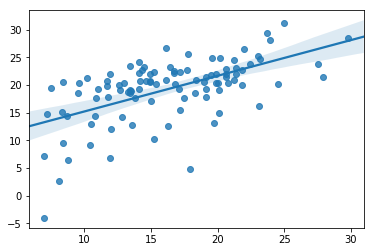

In [49]:
sns.regplot(test_targets, preds)